In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

- this lesson actually comes from the Intro to Self-Driving Cars Nanodegree program
- we're including it here as completely optional in case you'd like a quick refresher on basic geometry and trigonometry
- many aspects of self-driving cars depend heavily on geometric in trigonometric reasoning

- once you have a car pointing in a certain direction and you know how far it moves, how do you figure out exactly how far it's moved in the $x$ direction or in the $y$ direction?
- that is what you are going to learn in this lesson
  - how to go from a heading and a distance traveled to a change in $x$ and $y$
  - to do this, we're going to need to learn the very basics of trigonometry
  
<img src="resources/lesson_goal.png"/>
  
- this picture captures the goal of this lesson: if you know a car's heading (theta) and distance traveled (D), how can we figure out how far it's moved in the x direction (delta x) and y direction (delta y)?

# Plotting Robot Motion (right angles only)

## Right Angle Robot

- before we jump into trigonometry, I want to familiarize you with the Vehicle class you'll be using in this lesson (and get you thinking about motion in general)
- you will complete a `Vehicle` class by filling out two methods: `drive_forward` and `turn_right`


- note that this version of a Vehicle class can ONLY face in one of 4 directions: (E)ast, (N)orth, (W)est, or (S)outh
- the vehicle's current direction is stored in its `heading` property

In [2]:
from matplotlib import pyplot as plt


class Vehicle:
    def __init__(self):
        """
        Creates new vehicle at (0,0) with a heading pointed East.
        """
        self.x = 0  # meters
        self.y = 0
        self.heading = "E"  # Can be "N", "S", "E", or "W"
        self.history = []

    # TODO-1 - Implement this function
    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """

        # vehicle currently pointing east...
        if self.heading == "E":
            delta_x = displacement
            delta_y = 0

        # north
        elif self.heading == "N":
            # FILL THIS OUT
            delta_x = 0
            delta_y = displacement

        # west
        elif self.heading == "W":
            # FILL THIS OUT
            delta_x = -displacement
            delta_y = 0

        # south
        else:
            # FILL THIS OUT
            delta_x = 0
            delta_y = -displacement

        new_x = self.x + delta_x
        new_y = self.y + delta_y

        # this line appends the current (x,y) coordinates to the vehicle's history
        # useful for plotting the vehicle's trajectory
        # you shouldn't need to change this line

        self.history.append((self.x, self.y))

        self.x = new_x
        self.y = new_y

    def turn(self, direction):
        if direction == "L":
            self.turn_left()
        elif direction == "R":
            self.turn_right()
        else:
            print("Error. Direction must be 'L' or 'R'")
            return

    def turn_left(self):
        """
        Updates heading (for a left turn) based on current heading
        """
        next_heading = {"N": "W", "W": "S", "S": "E", "E": "N"}
        self.heading = next_heading[self.heading]

    # TODO-2 - implement this function
    def turn_right(self):
        """
        Updates heading (for a right turn) based on current heading
        """
        next_heading = {"N": "E", "W": "N", "S": "W", "E": "S"}
        self.heading = next_heading[self.heading]

    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        X = [p[0] for p in self.history]
        Y = [p[1] for p in self.history]

        X.append(self.x)
        Y.append(self.y)

        plt.scatter(X, Y)
        plt.plot(X, Y)
        plt.show()

<IPython.core.display.Javascript object>

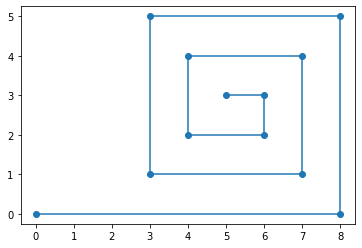

Nice job! Your vehicle is behaving as expected!


<IPython.core.display.Javascript object>

In [3]:
# TESTING CODE 1

# instantiate vehicle
v = Vehicle()

# drive in spirals of decreasing size
v.drive_forward(8)
v.turn("L")

v.drive_forward(5)
v.turn("L")

v.drive_forward(5)
v.turn("L")

v.drive_forward(4)
v.turn("L")

v.drive_forward(4)
v.turn("L")

v.drive_forward(3)
v.turn("L")

v.drive_forward(3)
v.turn("L")

v.drive_forward(2)
v.turn("L")

v.drive_forward(2)
v.turn("L")

v.drive_forward(1)
v.turn("L")

v.drive_forward(1)

# show the trajectory. It should look like a spiral
v.show_trajectory()

# TESTING
assert v.x == 5
assert v.y == 3
first_5 = [(0, 0), (8, 0), (8, 5), (3, 5), (3, 1)]
assert first_5 == v.history[:5]
print("Nice job! Your vehicle is behaving as expected!")

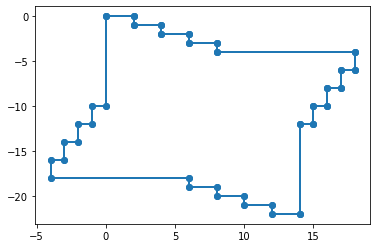

Nice job! Your vehicle passed the zig zag test.


<IPython.core.display.Javascript object>

In [4]:
# TESTING CODE Part 2
def test_zig_zag():
    v = Vehicle()
    for i in range(10):
        for _ in range(4):
            v.drive_forward(2)
            v.turn("R")
            v.drive_forward(1)
            v.turn("L")
        v.drive_forward(10)
        v.turn("R")
    first_six = [(0, 0), (2, 0), (2, -1), (4, -1), (4, -2), (6, -2)]
    v.show_trajectory()
    assert v.x == 14
    assert v.y == -22
    assert v.history[:6] == first_six
    print("Nice job! Your vehicle passed the zig zag test.")


test_zig_zag()

# Moving at an Angle

- in the previous task, we only learned orientations that pointed east, north, west, or south
- because we constrained the robots suppose this way, it was easy to figure out what happened when the vehicle moved forward by $D$ meters for example
  - in this case, if we have a car that is pointing east and then moves to distance $D$, I can see that the $x$ coordinate just increases by $D$, and the $y$ coordinate doesn't change at all
  - likewise, if the car is pointing north and then moves forward by $D$ meters, then the $y$ coordinate will increase by $D$, and the $x$ coordinate will be left unchanged


- but now the question is, what if the heading isn't along the $x$ or $y$ axis?
- what if the car is pointing at some weird angle like this?
  - now what happens when the car moves forward by, let's say, $D$ meters?
  - what can you say about the value for $\Delta x$ and for $\Delta y$ in a situation like this?

<img src="resources/moving_at_an_angle.png"/>

- when a car is pointed like this and it moves forward by $D$ meters, its $x$ and $y$ coordinates both increase by an amount that's greater than zero but less than $D$
  - $0 < \Delta x < D$ &nbsp;&nbsp;,&nbsp;&nbsp; $0 < \Delta y < D$


- if we're going to make scatter plots of position data, we need to know exactly what the values of $\Delta x$ and $\Delta y$ are and this will require some trigonometry, which is the mathematics of right triangles, so it's not surprising that our first step is to find a right triangle

# Moving at 53.13 Degrees

- as a first example, I'm going to make things a little easier by picking a very particular angle for this car set
  - I'm going to pick theta to be $53.13$ degrees and $D$ is going to be $5$ meters
  - the reason I picked these numbers is because it turns out that when a car with a heading of fifty three point one three degrees drives forward by $5$ meters, if you measure $\Delta x$, and $\Delta y$ you'll find they are exactly equal to $3$ meters and $4$ meters

<img src="resources/moving_at_5313.png"/>

- in fact, if you ever have a right triangle were one of the angles is $53.13$ degrees, the sides will have lengths in these ratios, $3, 4, 5$
- what this means is that if I ever find that my car is heading of $53.13$ degrees and I know how far it moves forward I'll be able to figure out $\Delta x$ and $\Delta y$

- If $D = 10$ meters then what would $\Delta x$ and $\Delta y$ be?
  - if you double the length of one side, all the other sides must double in length as well
  - $\Delta x$ will be $6$ meters and $\Delta y$ will be $8$ meters

# Who Cares About 53.13 Degrees?

- you just calculated the following values for a vehicle with a heading of $53.13$ degrees

| D  | $\Delta y$ | $\Delta x$ |
|----|-----|-----|
| 5  | 4   | 3   |
| 10 | 8   | 6   |
| 1  | 4/5 | 3/5 |

- but really, for this particular angle we can say something much more general
- we can say:
  - $\Delta y = \frac{4}{5} \times D$
  - $\Delta x = \frac{3}{5} \times D$
- tese are very useful equations!
  - they tell us that the vertical displacement is equal to total displacement times some multiplier (in this case $4/5$)
  - likewise, horizontal displacement is total displacement times some other multiplier (in this case $3/5$)


- and this is useful.... for all those times when you're driving at $53.13$ degrees?
- what about every other possible angle--wouldn't it be nice to calculate these multipliers for any angle?

# The Power of Trigonometry

- if you drive some distance $D$ at a heading of $53.13$ degrees, then your $\Delta x$ will be that distance $D$ multiplied by $3/5$ and $\Delta y$ will be that distance $D$ multiplied by $4/5$
  - these multipliers are really useful
  - they let us go from a distance traveled to $\Delta x$ and $\Delta y$, but that's just one angle


- what if you're driving with a heading of $27.2$ degrees, or negative $112.5$?
- how can we calculate $\Delta x$ and $\Delta y$ in those situations?
  - we'd like to use multipliers just like we did with the $3$, $4$, $5$ triangle, and that is where trigonometry comes in
  - the trig gives us a way to easy calculate easy multipliers for any angle


- we're going to come back to cars in a minute, but for now, we're going to dig deeper into triangles themselves, and the first thing we're going to need is a naming convention for talking about the size of a right triangle

# Opposite, Adjacent, Hypotenuse

- in our previous example, we only really cared about one of the three angles in the triangle
- when we're solving trig problems, we generally only care about one angle at a time
- we're going to call this angle, the reference angle
- in the previous example, reference angle was $53.13$ degrees

- now I want to consider some generic reference angle, which we'll just call a theta
- when we have a right triangle and some reference angle, we'd like a way to refer unambiguously to the three sites, and the naming convention we use in trig goes like this:
  - the longest side of the right triangle is always called the hypotenuse
  - the side on the right, the one that's opposite the reference angle, well that's just called the opposite
  - the this last remaining side, the one that's next to the reference angle, well we call that the adjacent side

<img src="resources/opposite_adjacent_hypotenuse.png"/>

- in the image below
  - $a$ is hypotenuse, $b$ is opposite and $c$ is adjacent
- when $y$ is taken as the reference angle
  - $a$ is hypotenuse, $c$ is opposite and $b$ is adjacent
- whether a side is "opposite" or "adjacent" depends on which angle is taken to be the reference angle
  
<img src="resources/opposite_adjacent_hypotenuse_2.png"/>

# Trigonometric Ratios

- now that we can talk about the sides of a right triangle using words like opposite, adjacent and hypotenuse, I want to talk about the ratios of those sides
- the trigonometric ratios we're going to discuss are called *sine*, *cosine* and *tangent*


- the sine of an angle is the ratio of the opposite to the hypotenuse: $\sin(\theta) = \dfrac{\text{opposite}}{\text{hypotenuse}}$


- the cosine of an angle is the ratio of the adjacent to the hypotenuse, $\cos(\theta) = \dfrac{\text{adjacent}}{\text{hypotenuse}}$


- the tangent of an angle is the ratio of the opposite to the adjacent, $\tan(\theta) = \dfrac{\text{opposite}}{\text{adjacent}}$

# Looking up Sin, Cos, and Tan

## Looking up Trig Ratios

- there are three ways you could find the value of a trig function at a particular angle

**1. Use a table**
  - this is how engineers used to find trig ratios before the days of computers
  - for example, from the table below I can see that $\sin(60)=0.866$

| angle | sin | cos | tan |
| :---: | :---: | :---: | :---: |
| 0 | 0.000 | 1.000 | 0.000 |
| 10 | 0.174 | 0.985 | 0.176 |
| 20 | 0.342 | 0.940 | 0.364 |
| 30 | 0.500 | 0.866 | 0.577 |
| 40 | 0.643 | 0.766 | 0.839 |
| 50 | 0.766 | 0.643 | 1.192 |
| 60 | 0.866 | 0.500 | 1.732 |
| 70 | 0.940 | 0.342 | 2.747 |
| 80 | 0.985 | 0.174 | 5.671 |

  - the problem with this technique is that there will always be gaps in a table

**2. Use a graph**
  - one way to try to fill these gaps is by consulting a graph of a trigonometric function. For example, the image below shows a plot of $\sin(\theta)$ for $0 \leq \theta \leq 360$

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a2efe68_sine/sine.png)

  - these graphs are nice because they give a good visual sense for how these ratios behave, but they aren't great for getting accurate values

**3. Use a computer!**
  - this probably isn't a surprise, but python has built in functions to calculate sine, cosine, and tangent...
  - in fact, you can even type "sin(60 degrees)" into **Google** and you'll get the correct answer!
    - note how I wrote in "sin(60 degrees)" instead of just "sin(60)"
    - that's because these functions generally expect their input to be in **radians**

In [5]:
# Python's math module has functions called sin, cos, and tan
# as well as the constant "pi" (which we will find useful shortly)
from math import sin, cos, tan, pi

# Run this cell. What do you expect the output to be?
print(sin(60))

-0.3048106211022167


<IPython.core.display.Javascript object>

### EXERCISE 1 - Write a function that converts degrees to radians

- implement the following math in code: $\theta_{\text{radians}} = \theta_{\text{degrees}} \times \frac{\pi}{180}$

In [6]:
from math import pi


def deg2rad(theta):
    """Converts degrees to radians"""
    # TODO - implement this function
    return theta * pi / 180


assert deg2rad(45.0) == pi / 4
assert deg2rad(90.0) == pi / 2
print("Nice work! Your degrees to radians function works!")

for theta in [0, 30, 45, 60, 90]:
    theta_rad = deg2rad(theta)
    sin_theta = sin(theta_rad)
    print("sin(", theta, "degrees) =", sin_theta)

Nice work! Your degrees to radians function works!
sin( 0 degrees) = 0.0
sin( 30 degrees) = 0.49999999999999994
sin( 45 degrees) = 0.7071067811865475
sin( 60 degrees) = 0.8660254037844386
sin( 90 degrees) = 1.0


<IPython.core.display.Javascript object>

### EXERCISE 2 - Make plots of cosine and tangent

In [7]:
import numpy as np
from matplotlib import pyplot as plt


def plot_sine(min_theta, max_theta):
    """
    Generates a plot of sin(theta) between min_theta
    and max_theta (both of which are specified in degrees).
    """
    angles_degrees = np.linspace(min_theta, max_theta)
    angles_radians = deg2rad(angles_degrees)
    values = np.sin(angles_radians)
    X = angles_degrees
    Y = values
    plt.plot(X, Y)
    plt.show()


# EXERCISE 2.1 Implement this! Try not to look at the
#  implementation of plot_sine TOO much...
def plot_cosine(min_theta, max_theta):
    """
    Generates a plot of sin(theta) between min_theta
    and max_theta (both of which are specified in degrees).
    """
    angles_degrees = np.linspace(min_theta, max_theta)
    angles_radians = deg2rad(angles_degrees)
    values = np.cos(angles_radians)
    X = angles_degrees
    Y = values
    plt.plot(X, Y)
    plt.show()

<IPython.core.display.Javascript object>

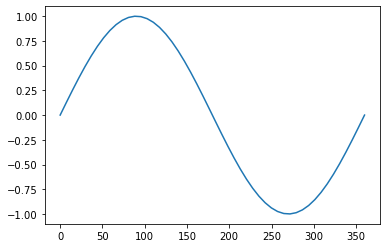

<IPython.core.display.Javascript object>

In [8]:
plot_sine(0, 360)

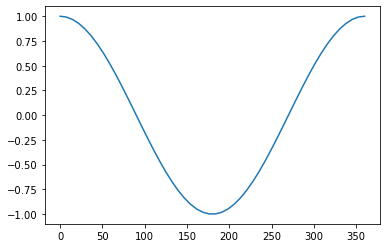

<IPython.core.display.Javascript object>

In [9]:
plot_cosine(0, 360)

# Trigonometry and Vehicle Motion

- remember our initial problem?
  - given the vehicles heading angle and the displacement, calculate delta x and delta y
- now, instead of thinking about a vehicle and a displacement, we can just think about a right triangle
  - this let's us change our problem statement to
    - given the right triangles reference angle and hypotenuse, calculate the length of the adjacent and opposite sides


- now that we can phrase our driving problem as a triangle problem, we can solve it with trigonometry

# Solving Trig Problems

- let me demonstrate how to solve a problem like this
- we have a vehicle with a heading of $65$ degrees and the displacement of $17$ meters
- I'm going to show you how I would find out the $x$ systematically
  - the first thing I'm going to do is draw the triangle
    - here we have a right triangle with a reference angle of $65$ degrees
  - next, I'm going to identify the known and unknown sides of the triangle
    - in this case, the known side is the hypotenuse with a length of $17$ meters, and the unknown side is this $\Delta x$, and that's the adjacent side
  - now I want to find the trigonometric ratio that relates the known and unknown sides
    - in this case, I'm looking for the ratio that relates the hypotenuse to the adjacent
    - that happens to be the cosine because cosine is adjacent over hypotenuse which, in this case, is $\Delta x$ over $17$
  - now, all that's left to do is do the math
    - the first thing I want to do, now that I've cleaned things up on the left over here, is rearrange this equation to get $\Delta x$ alone
    - then, I can use Python or a calculator to look up the cosine of $65$ degrees
    - and remember, you really have to be careful with degrees and radians here
    - once I get the answer, I see the cosine of $65$ degrees is $0.423$ and now I just do up the multiplication to find that $\Delta x$ is $7.18$ meters

<img src="resources/solving_trig_problems.png"/>

# Keeping Track of Vehicle x and y

- now that you know how to solve trigonometry problems, you can keep track of a vehicle's $x$ and $y$ coordinates as it moves in any direction

- the goal of this lesson is for you to implement a few methods in a `Vehicle` class
- once complete, your code will be used like this:

```python
# instantiate vehicle
v = Vehicle()

# drive forward 10 meters
v.drive_forward(10)

# turn left in 10 increments of 9 degrees each.
for _ in range(10):
    v.turn(9.0)
    v.drive_forward(1)

v.drive_forward(10)

v.show_trajectory()
```

and this final call to `show_trajectory` should produce a graph that looks like this:

![](https://d17h27t6h515a5.cloudfront.net/topher/2017/December/5a3184b7_xy-traj/xy-traj.png)

- if, instead of calling 

```python
v.show_trajectory()
```

we had written:

```python
print(v.history)
```

we would have seen a list of `(x,y)` tuples representing the vehicle's history that looks like this:

```python
[(0.0, 0.0),
 (10.0, 0.0),
 (10.988, 0.156),
 (11.939, 0.465),
 (12.830, 0.919),
 (13.639, 1.507),
 (14.346, 2.214),
 (14.934, 3.023),
 (15.388, 3.914),
 (15.697, 4.865),
 (15.853, 5.853),
 (15.853, 6.853)]
```

- note that it's this `history` data that is used to plot the points in `show_trajectory`

In [10]:
import numpy as np
from math import sin, cos, pi
from matplotlib import pyplot as plt

# TODO
# Complete the methods in the vehicle class.
# If the requirements of any method are unclear, look at the testing code


class Vehicle:
    def __init__(self):
        self.x = 0.0  # meters
        self.y = 0.0
        self.heading = 0.0  # radians
        self.history = []

    def drive_forward(self, displacement):
        """
        Updates x and y coordinates of vehicle based on 
        heading and appends previous (x,y) position to
        history.
        """
        delta_x = displacement * np.cos(self.heading)
        delta_y = displacement * np.sin(self.heading)

        new_x = self.x + delta_x
        new_y = self.y + delta_y

        self.history.append((self.x, self.y))

        self.x = new_x
        self.y = new_y

    def set_heading(self, heading_in_degrees):
        """
        Sets the current heading (in radians) to a new value
        based on heading_in_degrees. Vehicle heading is always
        between 0 and 2 * pi.
        """
        assert -180 <= heading_in_degrees <= 180
        rads = (heading_in_degrees * pi / 180) % (2 * pi)
        self.heading = rads

    def turn(self, angle_in_degrees):
        """
        Changes the vehicle's heading by angle_in_degrees. Vehicle 
        heading is always between 0 and 2 * pi.
        """
        rads = angle_in_degrees * pi / 180
        new_head = self.heading + rads % (2 * pi)
        self.heading = new_head

    def show_trajectory(self):
        """
        Creates a scatter plot of vehicle's trajectory.
        """
        # get the x and y coordinates from vehicle's history
        X = [p[0] for p in self.history]
        Y = [p[1] for p in self.history]

        # don't forget to add the CURRENT x and y
        X.append(self.x)
        Y.append(self.y)

        # create scatter AND plot (to connect the dots)
        plt.scatter(X, Y)
        plt.plot(X, Y)

        plt.title("Vehicle (x, y) Trajectory")
        plt.xlabel("X Position")
        plt.ylabel("Y Position")
        plt.axes().set_aspect("equal", "datalim")
        plt.show()

<IPython.core.display.Javascript object>

In [11]:
# Use this testing code to check your code for correctness.
def close_enough(v1, v2):
    """
    Helper function for testing if two values are "close enough" 
    to be considered equal.
    """
    return abs(v1 - v2) <= 0.0001


def test_set_heading(Vehicle):
    v = Vehicle()
    if v.heading != 0:
        print("Error")
        print("Do not modify __init__.")
        print("Vehicle starts with heading of 0.")
        return

    v.set_heading(90)
    if v.heading == 90:
        print("Error")
        print("Heading should be stored in radians, not degrees.")
        return

    if not close_enough(v.heading, pi / 2):
        print("Error")
        print("After calling set_heading(90), heading was not pi/2")
        print("Instead, heading was", v.heading)
        return

    print("Your set_heading function looks good!")


def test_drive_forward(Vehicle):

    # check for appropriate behavior when driving EAST
    v = Vehicle()
    v.set_heading(0.0)
    v.drive_forward(10)
    if not close_enough(v.x, 10) or not close_enough(v.y, 0):
        print("Error")
        print("When vehicle's heading is 0, a motion of 10")
        print("Should move the vehicle forward 10 in the x direction")
        return

    # check for appropriate behavior when driving NORTH
    v = Vehicle()
    v.set_heading(90.0)
    v.drive_forward(10)
    if not close_enough(v.y, 10) or not close_enough(v.x, 0):
        print("Error")
        print("When vehicle's heading is pi/2 (north), a motion of 10")
        print("Should move the vehicle forward 10 in the y direction")
        return

    # check for appropriate behavior when driving at an angle
    v = Vehicle()
    v.set_heading(30.0)
    v.drive_forward(10)
    if not close_enough(v.y, 5) or not close_enough(v.x, 8.66025):
        print("Error")
        print("When vehicle's heading is pi/2 (north), a motion of 10")
        print("Should move the vehicle forward 10 in the y direction")
        return

    print("Congratulations! Your vehicle's drive_forward method works")


test_set_heading(Vehicle)
test_drive_forward(Vehicle)

Your set_heading function looks good!
Congratulations! Your vehicle's drive_forward method works


<IPython.core.display.Javascript object>

/home/luka/miniconda3/envs/carnd-term1/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


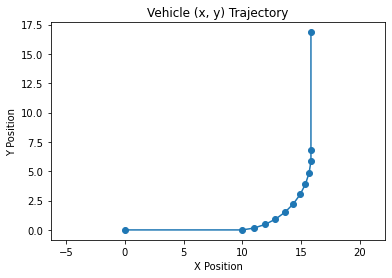

<IPython.core.display.Javascript object>

In [12]:
# You'll have to "test" your show_trajectory method visually.
# Run the code below and see if the plot that's produced looks
# similar to the plot above.

# instantiate vehicle
v = Vehicle()

# drive forward 10 meters
v.drive_forward(10)

# turn left in 10 increments of 9 degrees each.
for _ in range(10):
    v.turn(9.0)
    v.drive_forward(1)

v.drive_forward(10)

v.show_trajectory()